In [1]:
import numpy as np
import scipy.optimize as opt
from scipy.signal import peak_widths
import matplotlib.pyplot as plt

In [2]:
alphas = [1/3, 1/3, 1/3]
betas = [50., 50., 50.]
gammas = [5., 5., 5.]
c = 0

In [3]:
def logistic_function(x, alpha, beta, gamma):
    return alpha / (1. + np.exp((x - beta) / gamma))


def logistic_sum(x, a1, a2, a3, b1, b2, b3, g1, g2, g3, c):
    alphas = [a1, a2, a3]
    betas = [b1, b2, b3]
    gammas = [g1, g2, g3]
    out = 0.0
    for (alpha, beta, gamma) in zip(alphas, betas, gammas):
        out += logistic_function(x, alpha, beta, gamma)
    out += c
    return out

In [4]:
number_of_pixels = 100
accuracy_factor = 10000
x = np.linspace(0, number_of_pixels, number_of_pixels)
ground_truth = logistic_sum(x, *alphas, *betas, *gammas, c)
row = logistic_sum(x, *alphas, *betas, *gammas, c) +  0.2 * alphas[0] * np.random.randn(number_of_pixels)

In [5]:
def calculate_full_width_half_maximum_value(row, accuracy_factor=100):
    number_of_pixels = len(row)
    x = np.linspace(0, number_of_pixels, num=number_of_pixels * accuracy_factor)
    estimated_parameters = [0.3, 0.3, 0.3,
                            number_of_pixels / 2., number_of_pixels / 2., number_of_pixels / 2.,
                            1., 1., 1.,
                            0]
    (a1, a2, a3, b1, b2, b3, g1, g2, g3, c), _ = opt.curve_fit(logistic_sum,
                                                               np.arange(number_of_pixels),
                                                               row,
                                                               p0=estimated_parameters)
    alphas = [a1, a2, a3]
    betas = [b1, b2, b3]
    gammas = [g1, g2, g3]
    fitted_row = logistic_sum(x, *alphas, *betas, *gammas, c)
    differences = -np.diff(fitted_row)
    half_max = np.max(differences)/2.
    indices = np.where(np.diff(np.sign(differences - half_max)))[0]
    return (indices[-1] - indices[0])/accuracy_factor, fitted_row

In [6]:
fwhm1, fitted_row1 = calculate_full_width_half_maximum_value(row, accuracy_factor=accuracy_factor)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


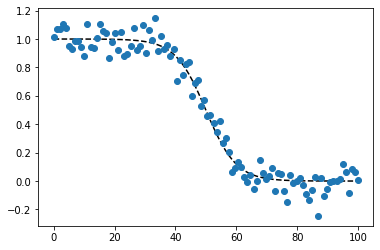

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, ground_truth, '--k')
ax.plot(x, row, 'o')

In [8]:
np.seterr(all='ignore')
estimate = [0.3, 0.3, 0.3, 50., 50., 50., 1., 1., 1., 0.]
(a1_, a2_, a3_, b1_, b2_, b3_, g1_, g2_, g3_, c_), _ = opt.curve_fit(logistic_sum, x, row,  p0=estimate)
alphas_= [a1_, a2_, a3_]
betas_ = [b1_, b2_, b3_]
gammas_ = [g1_, g2_, g3_]
c_ = c_

/opt/conda/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


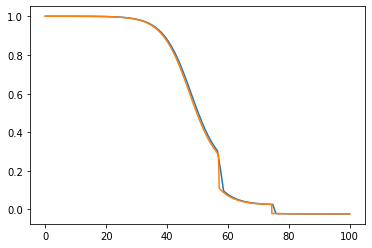

In [9]:
fitted_row2 = logistic_sum(x, *alphas_, *betas_, *gammas_, c_)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
#ax.plot(x, ground_truth, '--k')
#ax.plot(x, row, 'o')
ax.plot(x, fitted_row2, '-')
ax.plot(np.linspace(0, number_of_pixels, num=number_of_pixels*accuracy_factor), fitted_row1)

In [10]:
def diff_sum(x, alphas, betas, gammas):
    out = 0.0
    for (alpha, beta, gamma) in zip(alphas, betas, gammas):
        out += np.nan_to_num(diff(x, alpha, beta, gamma))
    return out

def diff(x, alpha, beta, gamma):
    return alpha * np.exp((x-beta)/gamma) / (gamma * (1. + np.exp((x - beta)/gamma))**2)

[0.1736110434753967, 0.04689748785722679, 0.8038676562800973]
[57.57767702853056, 75.5320796307696, 47.959952137841825]
[0.012483473954224557, 0.0037695947762265147, 4.578390578758901]


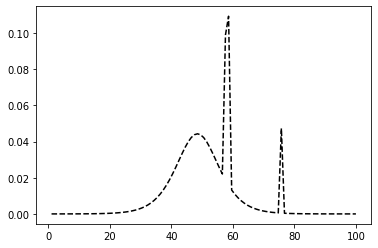

In [11]:
fit_diff = -np.diff(fitted_row2)
print(alphas_)
print(betas_)
print(gammas_)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x[1:], fit_diff, '--k')
#ax.plot(x_big, y_fit, '-')

In [12]:
half_max = np.max(fit_diff) / 2.
print(half_max)
d = np.array(fit_diff) - half_max
indices = np.where(np.diff(np.sign(d)))[0]
fwhm2 = list(indices)[-1] - list(indices)[0]
print(fwhm1, fwhm2)

0.054636411751798564
0.0041 2
